In [1]:
import pandas as pd
import numpy as np
import math as m
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE

In [2]:
def file_dataframe(txt_filename):
    if txt_filename == 'pca_a.txt':
        df = pd.read_csv(txt_filename, sep=",", header=None)
    else:
        df = pd.read_csv(txt_filename, sep="\t", header=None)
    return df

In [3]:
df_a = file_dataframe('pca_a.txt')
df_b = file_dataframe('pca_b.txt')
df_c = file_dataframe('pca_c.txt')

### Part1. PCA

In [4]:
def PCA(df):
    label = df[df.columns[-1]]
    df = df.drop(df.columns[-1], axis = 1)
    mean = np.mean(df, axis = 0)
    mean_transform = df - mean
    cov_mat = np.cov(mean_transform.T)
    eigen_value, eigen_vector = np.linalg.eig(cov_mat)
    pc = eigen_vector[:,0:2]
    result = np.dot(pc.T, mean_transform.T)
    return result, label

In [5]:
df_a_pca, label_a = PCA(df_a)
df_b_pca, label_b = PCA(df_b)
df_c_pca, label_c = PCA(df_c)
df_a_pca = pd.concat([pd.DataFrame(df_a_pca.T),label_a],axis=1)
df_b_pca = pd.concat([pd.DataFrame(df_b_pca.T),label_b],axis=1)
df_c_pca = pd.concat([pd.DataFrame(df_c_pca.T),label_c],axis=1)

In [6]:
def graph(dataframe):
    for i in dataframe[dataframe.columns[-1]].unique():
        col = np.array([[np.random.random(), np.random.random(), np.random.random()]])
        data = dataframe[dataframe[dataframe.columns[-1]]==i]
        p1 = plt.scatter(data[0], data[1], c=col, label=str(i))
    plt.legend()
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()

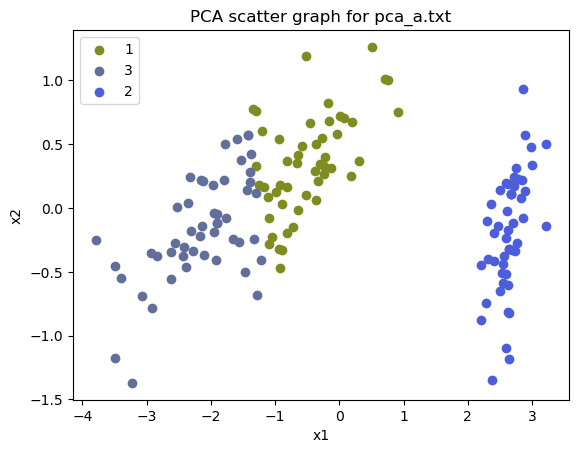

In [7]:
plt.title('PCA scatter graph for pca_a.txt')
graph(df_a_pca)

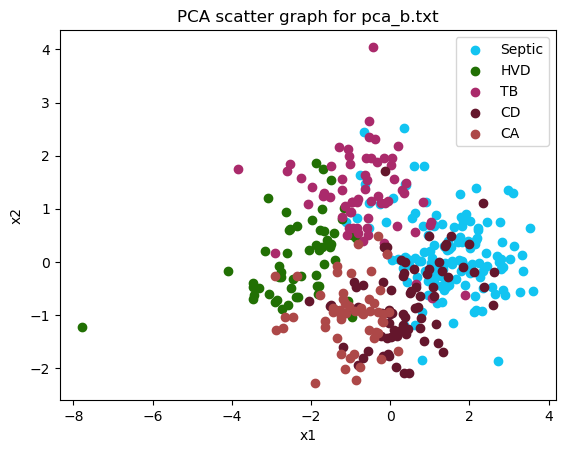

In [8]:
plt.title('PCA scatter graph for pca_b.txt')
graph(df_b_pca)

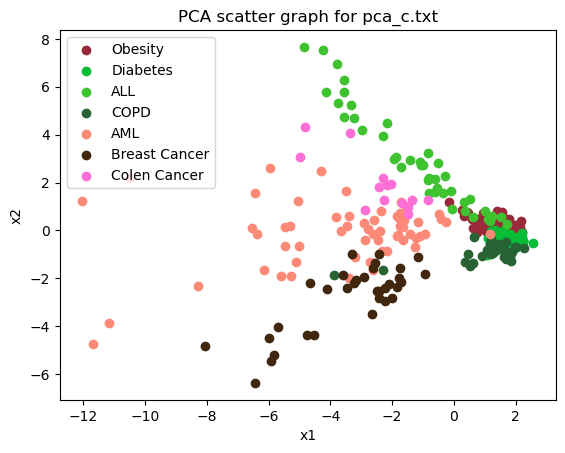

In [9]:
plt.title('PCA scatter graph for pca_c.txt')
graph(df_c_pca)

### Part2. SVD

In [10]:
svd = TruncatedSVD(n_components=2)
x1 = df_a.iloc[:, 0:len(df_a.columns)-1]
x2 = df_b.iloc[:, 0:len(df_a.columns)-1]
x3 = df_c.iloc[:, 0:len(df_a.columns)-1]
x1_svd = svd.fit_transform(x1)
x1_svd = pd.concat([pd.DataFrame(x1_svd),df_a.iloc[:,len(df_a.columns)-1]],axis=1)
x2_svd = svd.fit_transform(x2)
x2_svd = pd.concat([pd.DataFrame(x2_svd),df_b.iloc[:,len(df_b.columns)-1]],axis=1)
x3_svd = svd.fit_transform(x3)
x3_svd = pd.concat([pd.DataFrame(x3_svd),df_c.iloc[:,len(df_c.columns)-1]],axis=1)

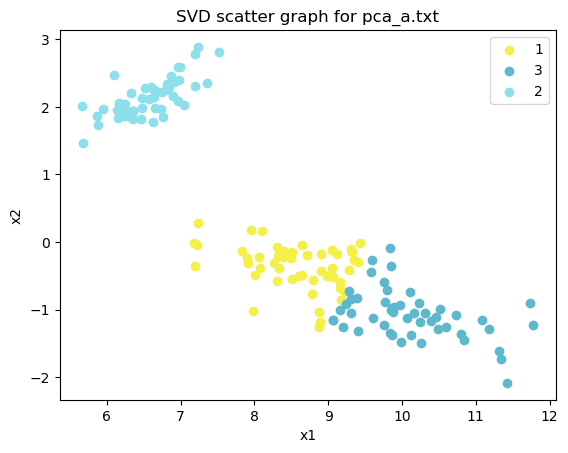

In [11]:
plt.title('SVD scatter graph for pca_a.txt')
graph(x1_svd)

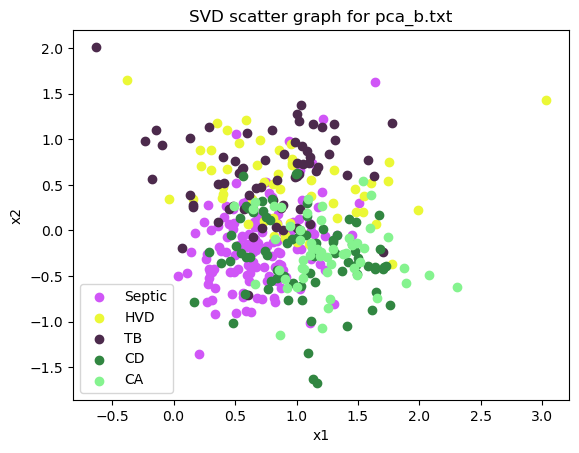

In [12]:
plt.title('SVD scatter graph for pca_b.txt')
graph(x2_svd)

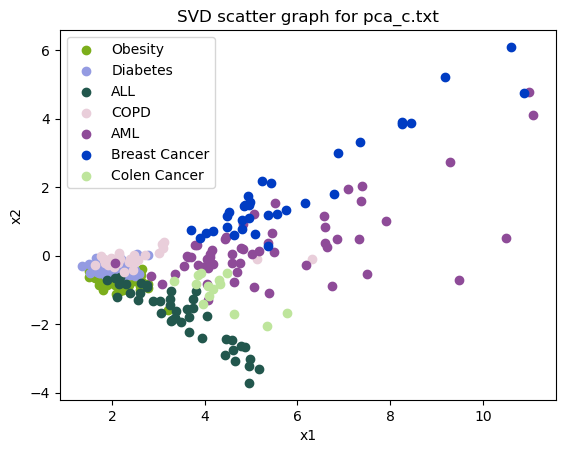

In [13]:
plt.title('SVD scatter graph for pca_c.txt')
graph(x3_svd)

### Part3. t-SNE

In [14]:
svd = TSNE(n_components=2)
x4 = df_a.iloc[:, 0:len(df_a.columns)-1]
x5 = df_b.iloc[:, 0:len(df_a.columns)-1]
x6 = df_c.iloc[:, 0:len(df_a.columns)-1]
x4_svd = svd.fit_transform(x4)
x4_svd = pd.concat([pd.DataFrame(x4_svd),df_a.iloc[:,len(df_a.columns)-1]],axis=1)
x5_svd = svd.fit_transform(x5)
x5_svd = pd.concat([pd.DataFrame(x5_svd),df_b.iloc[:,len(df_b.columns)-1]],axis=1)
x6_svd = svd.fit_transform(x6)
x6_svd = pd.concat([pd.DataFrame(x6_svd),df_c.iloc[:,len(df_c.columns)-1]],axis=1)

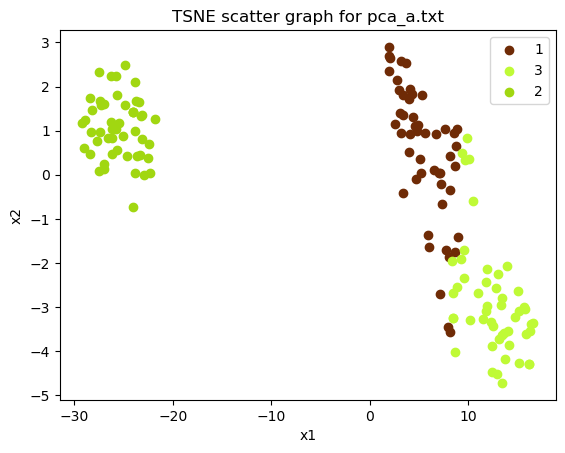

In [15]:
plt.title('TSNE scatter graph for pca_a.txt')
graph(x4_svd)

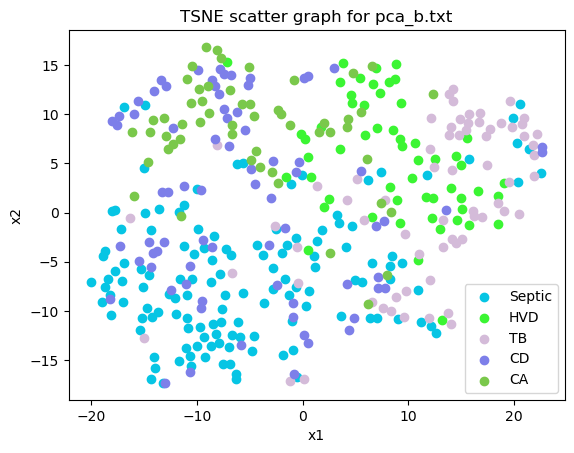

In [16]:
plt.title('TSNE scatter graph for pca_b.txt')
graph(x5_svd)

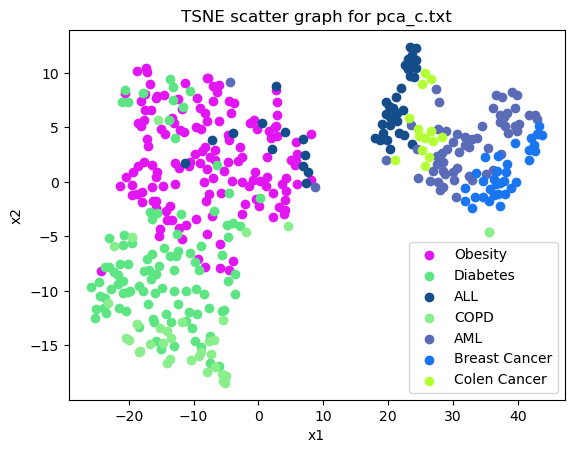

In [17]:
plt.title('TSNE scatter graph for pca_c.txt')
graph(x6_svd)